Name: Arnav Karwa
PRN: 1032232194

## Implementation of KNN and NBs

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

In [3]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    df[col] = le.fit_transform(df[col])

In [4]:
# Split into features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [8]:
# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [9]:
# MultinomialNB and BernoulliNB models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
multinb = MultinomialNB()
multinb.fit(X_train, y_train)
multinb_preds = multinb.predict(X_test)

bernoullinb = BernoulliNB()
bernoullinb.fit(X_train, y_train)
bernoullinb_preds = bernoullinb.predict(X_test)

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n===== {name} Evaluation =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


===== KNN Evaluation =====
Accuracy: 0.8532608695652174
Precision: 0.8846153846153846
Recall: 0.8598130841121495
F1 Score: 0.8720379146919431

Confusion Matrix:


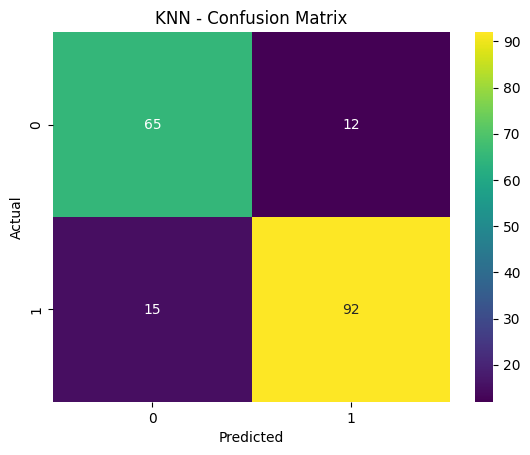


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


===== Naive Bayes Evaluation =====
Accuracy: 0.842391304347826
Precision: 0.8823529411764706
Recall: 0.8411214953271028
F1 Score: 0.861244019138756

Confusion Matrix:


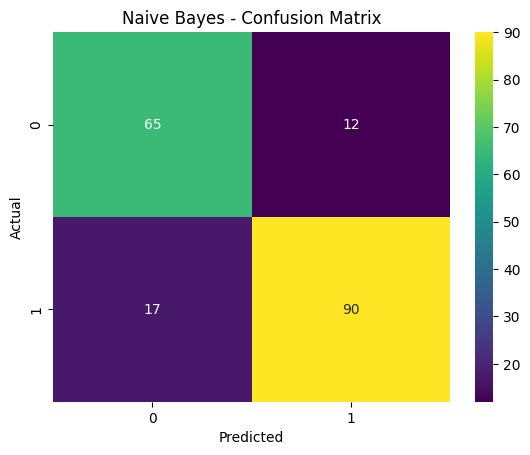


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


===== MultinomialNB Evaluation =====
Accuracy: 0.7771739130434783
Precision: 0.8586956521739131
Recall: 0.7383177570093458
F1 Score: 0.7939698492462312

Confusion Matrix:


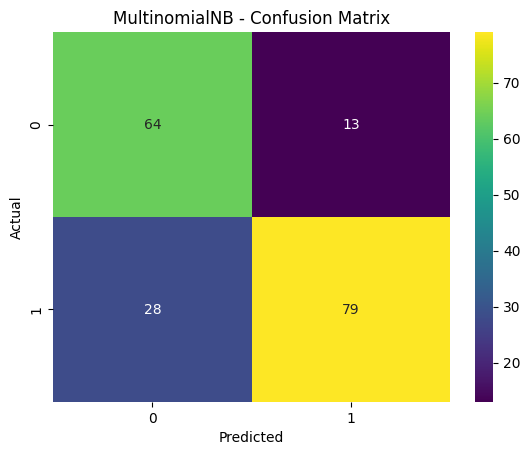


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.74      0.79       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184


===== BernoulliNB Evaluation =====
Accuracy: 0.7934782608695652
Precision: 0.8631578947368421
Recall: 0.7663551401869159
F1 Score: 0.8118811881188119

Confusion Matrix:


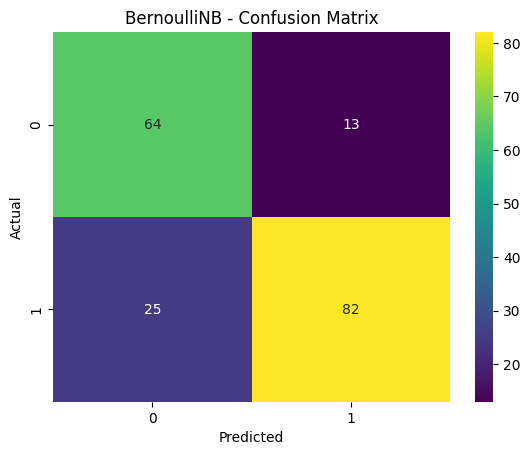


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184



In [11]:
# Evaluate all models
evaluate_model("KNN", y_test, knn_preds)
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("MultinomialNB", y_test, multinb_preds)
evaluate_model("BernoulliNB", y_test, bernoullinb_preds)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.853261,0.884615,0.859813,0.872038
1,Naive Bayes,0.842391,0.882353,0.841121,0.861244
2,MultinomialNB,0.777174,0.858696,0.738318,0.793970
3,BernoulliNB,0.793478,0.863158,0.766355,0.811881


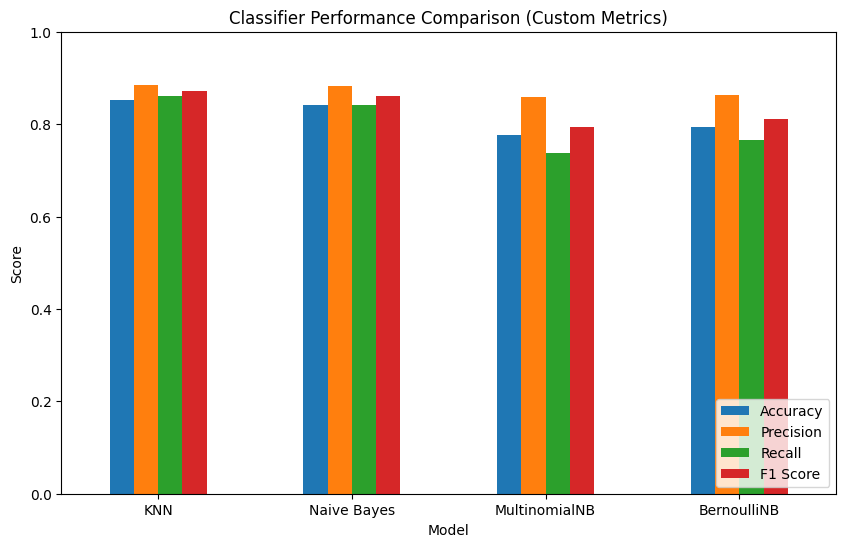

In [13]:
# Comparison table and graph for all classifiers (custom metrics)
def custom_accuracy(y_true, y_pred):
    # Accuracy = (TP + TN) / ALL
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return (tp + tn) / (tp + tn + fp + fn)

def custom_precision(y_true, y_pred):
    # Precision = TP / (TP + FP)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def custom_recall(y_true, y_pred):
    # Recall = TP / (TP + FN)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def custom_f1(y_true, y_pred):
    # F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    prec = custom_precision(y_true, y_pred)
    rec = custom_recall(y_true, y_pred)
    return 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

models = [
    ("KNN", knn_preds),
    ("Naive Bayes", nb_preds),
    ("MultinomialNB", multinb_preds),
    ("BernoulliNB", bernoullinb_preds)
]

results = []
for name, preds in models:
    acc = custom_accuracy(y_test.values, preds)
    prec = custom_precision(y_test.values, preds)
    rec = custom_recall(y_test.values, preds)
    f1 = custom_f1(y_test.values, preds)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)
display(results_df)

# Bar plot for comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
results_df.set_index("Model")[metrics].plot(kind="bar", figsize=(10,6))
plt.title("Classifier Performance Comparison (Custom Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()